In [1]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import numpy as np
import Via030 as via
import warnings
warnings.filterwarnings('ignore')

Number of cells:  2034


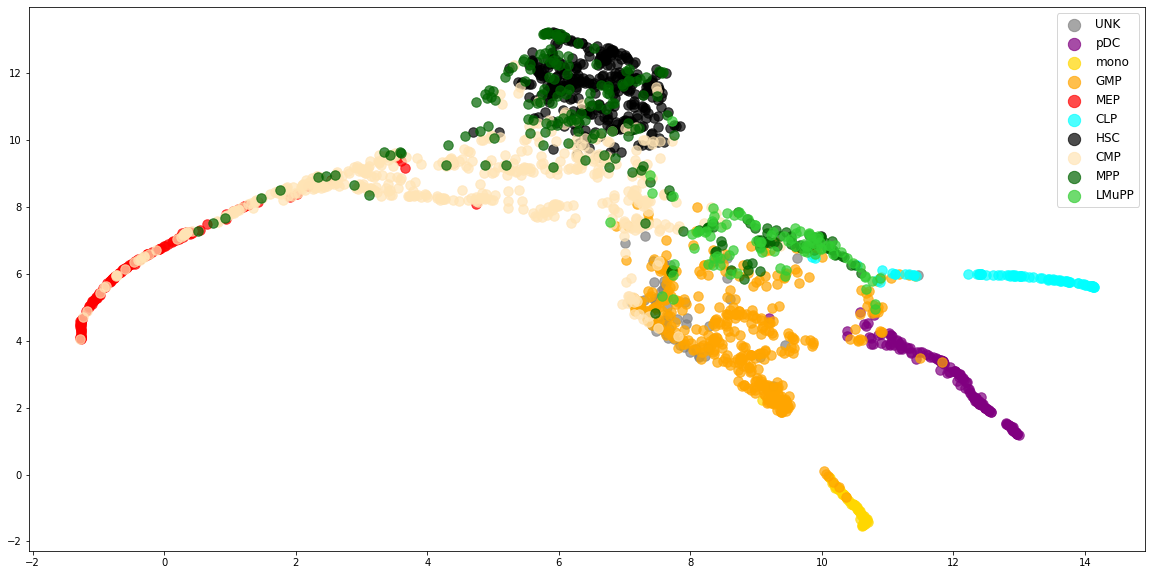

In [2]:
df = pd.read_csv('/home/shobi/Trajectory/Datasets/scATAC_Hemato/scATAC_hemato_Buenrostro.csv', sep=',')
cell_annot = df['cellname'].values
print('Number of cells: ', df.shape[0])

cell_types = ['GMP', 'HSC', 'MEP', 'CLP', 'CMP', 'LMuPP', 'MPP', 'pDC', 'mono', 'UNK']
cell_dict = {'UNK': 'gray', 'pDC': 'purple', 'mono': 'gold', 'GMP': 'orange', 'MEP': 'red', 'CLP': 'aqua',
                 'HSC': 'black', 'CMP': 'moccasin', 'MPP': 'darkgreen', 'LMuPP': 'limegreen'}
PCcol = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
#extracting cell-type from the cell-annotation
true_label = []
count = 0
found_annot = False
for annot in cell_annot:
    for cell_type_i in cell_types:
        if cell_type_i in annot:
            true_label.append(cell_type_i)
            if found_annot == True: print('double count', annot) #there should be no double counts
            found_annot = True

    if found_annot == False: #there should be zero unknowns
        true_label.append('unknown')
        count = count + 1
    found_annot = False

embedding = umap.UMAP(n_neighbors=20, random_state=2, repulsion_strength=0.5).fit_transform(df[PCcol])
fig, ax = plt.subplots(figsize=[20,10])

for key in cell_dict:
    loc = np.where(np.asarray(true_label) == key)[0]
    ax.scatter(embedding[loc, 0], embedding[loc, 1], c=cell_dict[key], alpha=0.7, label=key, s=90)
    
plt.legend(fontsize='large', markerscale=1.3)
plt.show()


input data has shape 2034 (samples) x 5 (features)


time is Tue Feb  2 18:15:16 2021
commencing global pruning
Share of edges kept after Global Pruning 63.56 %
number of components in the original full graph 1
for downstream visualization purposes we are also constructing a low knn-graph 


size neighbor array in low-KNN in pca-space for visualization (2034, 7)
commencing community detection
time is Tue Feb  2 18:15:17 2021
29  clusters before handling small/big
There are 0 clusters that are too big
scATAC: global cluster graph pruning level 0.15
number of components before pruning 1
percentage links trimmed from local pruning relative to start 0.0
percentage links trimmed from global pruning relative to start 45.5
there are  1 components in the graph
root user [1200]
start computing lazy-teleporting Expected Hitting Times


ended all multiprocesses, will retrieve and reshape
closeness  shortlist [1, 2, 8, 13, 16, 18, 19, 20, 21, 22, 23, 24]
betweeness shortlist [1, 2, 6, 8, 13, 16, 18, 19, 20, 21, 22, 23, 24]
out degree shortlist [0, 2, 3, 4, 5, 6, 8, 10, 11, 13, 14, 16, 18, 22, 24]
terminal clus in this component [8, 13, 16, 18, 21, 22, 23, 24]
final terminal clus [8, 13, 16, 18, 21, 22, 23, 24]


From root 19  to Terminal state 8 is found 350  times.


From root 19  to Terminal state 13 is found 102  times.


From root 19  to Terminal state 16 is found 100  times.


From root 19  to Terminal state 18 is found 334  times.


From root 19  to Terminal state 21 is found 5  times.


From root 19  to Terminal state 22 is found 54  times.


From root 19  to Terminal state 23 is found 49  times.


From root 19  to Terminal state 24 is found 5  times.
terminal clusters [8, 13, 16, 18, 21, 22, 23, 24]
project onto single cell
start single cell projections of pseudotime and lineage likelihood


number of components before pruning 1
percentage links trimmed from local pruning relative to start 26.7
percentage links trimmed from global pruning relative to start 50.0


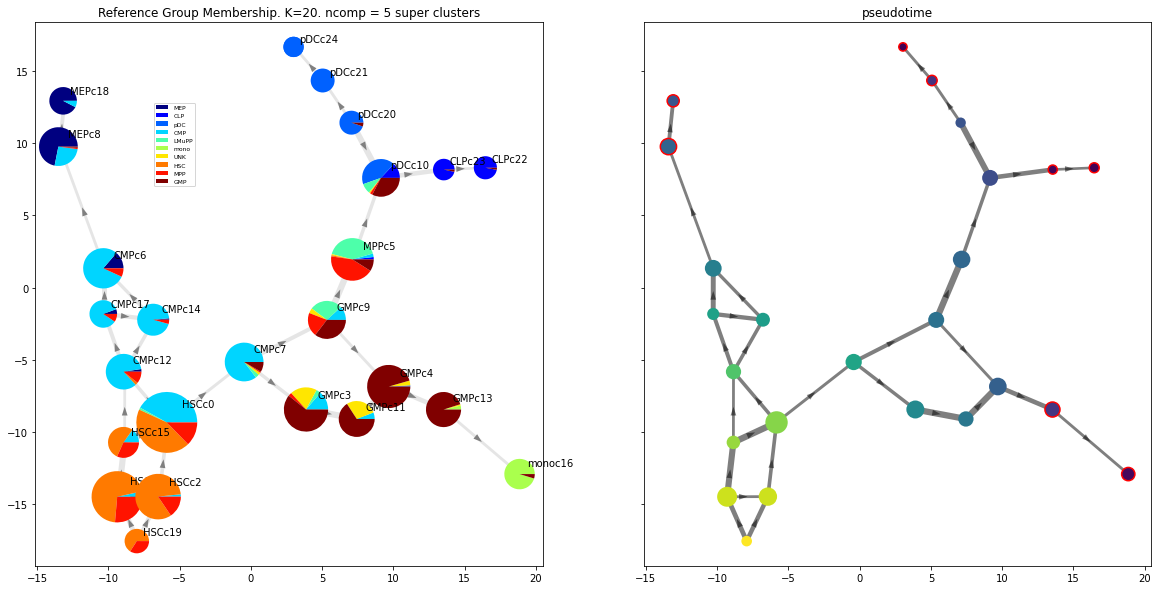

time elapsed 16.1 seconds
input data has shape 2034 (samples) x 5 (features)


time is Tue Feb  2 18:15:32 2021
commencing global pruning
Share of edges kept after Global Pruning 48.63 %
commencing community detection
time is Tue Feb  2 18:15:32 2021
63  clusters before handling small/big
There are 0 clusters that are too big
scATAC: global cluster graph pruning level 0.15
number of components before pruning 1
percentage links trimmed from local pruning relative to start 0.0
percentage links trimmed from global pruning relative to start 50.6
there are  1 components in the graph
root user [1200]
start computing lazy-teleporting Expected Hitting Times


ended all multiprocesses, will retrieve and reshape
super_terminal_clusters [8, 13, 16, 18, 21, 22, 23, 24]
terminal clus in this component [12, 6, 22, 29, 25, 27, 30, 33]
final terminal clus [12, 6, 22, 29, 25, 27, 30, 33]


From root 21  to Terminal state 12 is found 391  times.


From root 21  to Terminal state 6 is found 18  times.


From root 21  to Terminal state 22 is found 20  times.


From root 21  to Terminal state 29 is found 401  times.


From root 21  to Terminal state 25 is found 5  times.


From root 21  to Terminal state 27 is found 5  times.


From root 21  to Terminal state 30 is found 5  times.


From root 21  to Terminal state 33 is found 5  times.
terminal clusters [12, 6, 22, 29, 25, 27, 30, 33]
project onto single cell
start single cell projections of pseudotime and lineage likelihood


number of components before pruning 1
percentage links trimmed from local pruning relative to start 20.7
percentage links trimmed from global pruning relative to start 51.2


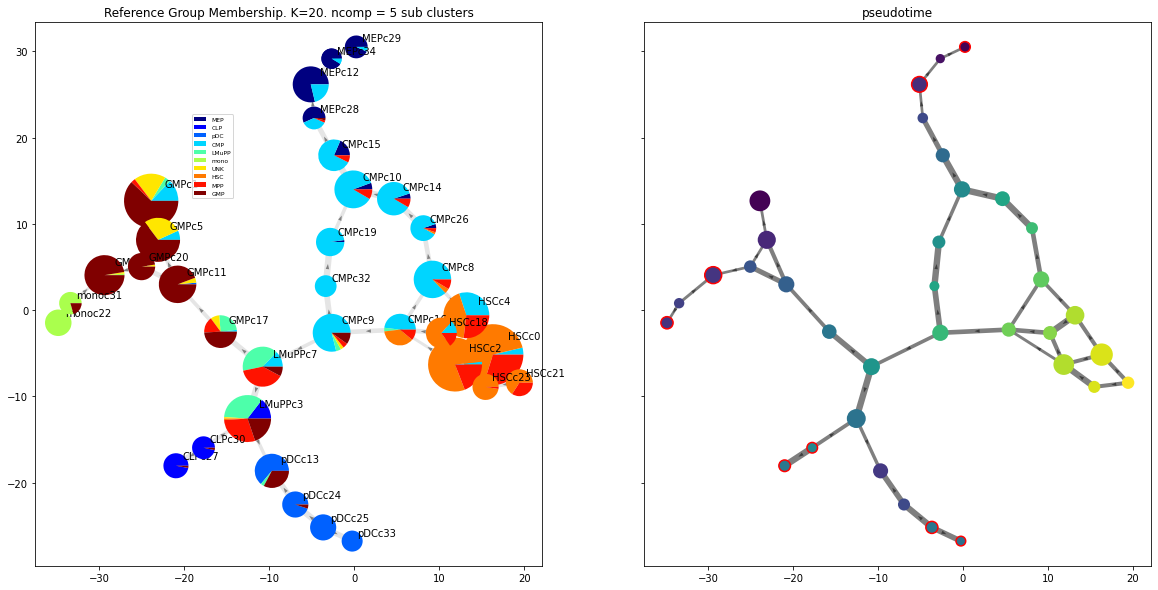

time elapsed 20.3 seconds


In [6]:
knn = 20
random_seed = 4
X_in = df[PCcol].values  

start_ncomp = 0
root = [1200] #HSC cell

v0 = via.VIA(X_in, true_label, jac_std_global=0.5, dist_std_local=1, knn=knn,
         too_big_factor=0.3, root_user=root, dataset='scATAC', random_seed=random_seed,
         do_magic_bool=True, is_coarse=True, preserve_disconnected=False) 
v0.run_VIA()

tsi_list = via.get_loc_terminal_states(v0, X_in)

v1 = via.VIA(X_in, true_label, jac_std_global=0.15, dist_std_local=1, knn=knn,
         too_big_factor=0.1, super_cluster_labels=v0.labels, super_node_degree_list=v0.node_degree_list,
         super_terminal_cells=tsi_list, root_user=root, is_coarse=False,
         preserve_disconnected=True, dataset='scATAC',
         super_terminal_clusters=v0.terminal_clusters, random_seed=random_seed,
         full_neighbor_array=v0.full_neighbor_array, full_distance_array=v0.full_distance_array,
         ig_full_graph=v0.ig_full_graph,
         csr_array_locally_pruned=v0.csr_array_locally_pruned)
v1.run_VIA()


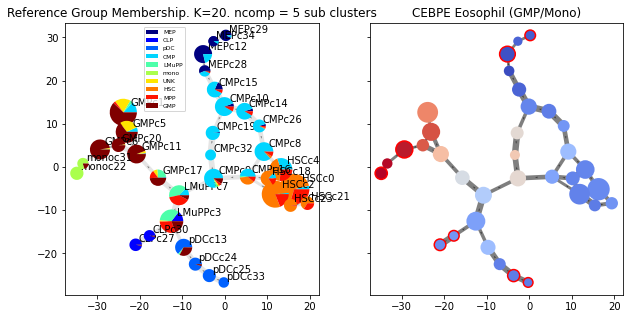

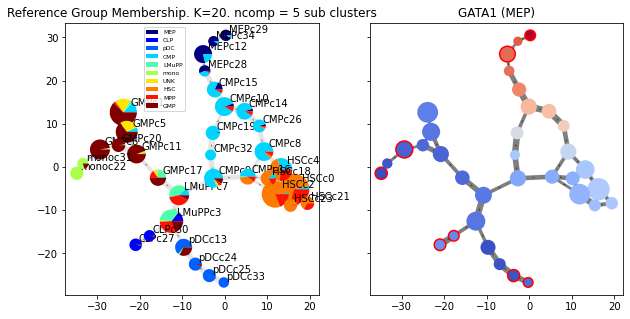

In [7]:
df['via1'] = v1.labels
df_mean = df.groupby('via1', as_index=False).mean()
gene_dict = {  'ENSG00000092067_LINE336_CEBPE_D_N1': 'CEBPE Eosophil (GMP/Mono)','ENSG00000102145_LINE2081_GATA1_D_N7':'GATA1 (MEP)'} 
for key in gene_dict:
    f, ((ax, ax1)) = plt.subplots(1, 2, sharey=True, figsize = [10,5])
    v1.draw_piechart_graph(ax, ax1, type_pt='gene', gene_exp=df_mean[key].values, title=gene_dict[key])
    plt.show()

dict of terminal state pairs, Super: sub:  {7: 12, 9: 14, 12: 7, 17: 22, 19: 34, 21: 25, 23: 26, 25: 33}


N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:  00:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

super cluster 7 is a super terminal with sub_terminal cluster 12
super cluster 9 is a super terminal with sub_terminal cluster 14
super cluster 12 is a super terminal with sub_terminal cluster 7
super cluster 17 is a super terminal with sub_terminal cluster 22
super cluster 19 is a super terminal with sub_terminal cluster 34
super cluster 21 is a super terminal with sub_terminal cluster 25
super cluster 23 is a super terminal with sub_terminal cluster 26
super cluster 25 is a super terminal with sub_terminal cluster 33
Cluster-path terminal state:  12 [21, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11, 28, 28, 28, 12, 12, 12, 12]
Cluster-path in downsampled embedded space (if visualization is performed on downampled input) terminal state:  12 [21, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11, 28, 28, 28, 12, 12, 12, 12]
target number 12


Cluster-path terminal state:  14 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 17, 17, 14, 14, 14]
Cluster-path in downsampled embedded space (if visualization is performed on downampled input) terminal state:  14 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 17, 17, 14, 14, 14]
target number 14
Cluster-path terminal state:  7 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 17, 17, 14, 14, 14, 10, 10, 7, 7, 7]
Cluster-path in downsampled embedded space (if visualization is performed on downampled input) terminal state:  7 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 17, 17, 14, 14, 14, 10, 10, 7, 7, 7]
target number 7


Cluster-path terminal state:  22 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 17, 17, 14, 14, 14, 14, 10, 10, 7, 7, 7, 7, 7, 31, 31, 31, 22, 22, 22, 22]
Cluster-path in downsampled embedded space (if visualization is performed on downampled input) terminal state:  22 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 17, 17, 14, 14, 14, 14, 10, 10, 7, 7, 7, 7, 7, 31, 31, 31, 22, 22, 22, 22]
target number 22


Cluster-path terminal state:  34 [21, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11, 28, 28, 12, 12, 12, 12, 12, 12, 12, 34, 34]
Cluster-path in downsampled embedded space (if visualization is performed on downampled input) terminal state:  34 [21, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11, 28, 28, 12, 12, 12, 12, 12, 12, 12, 34, 34]
target number 34
Cluster-path terminal state:  25 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 3, 14, 14, 14, 14, 14, 14, 14, 25, 25, 25, 25]
Cluster-path in downsampled embedded space (if visualization is performed on downampled input) terminal state:  25 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 3, 14, 14, 14, 14, 14, 14, 14, 25, 25, 25, 25]
target number 25


Cluster-path terminal state:  26 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 30, 30, 30, 30, 30, 30, 30, 26, 26, 26, 26]
Cluster-path in downsampled embedded space (if visualization is performed on downampled input) terminal state:  26 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 30, 30, 30, 30, 30, 30, 30, 26, 26, 26, 26]
target number 26


Cluster-path terminal state:  33 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 3, 14, 14, 14, 14, 14, 14, 14, 25, 25, 25, 25, 25, 33, 33, 33]
Cluster-path in downsampled embedded space (if visualization is performed on downampled input) terminal state:  33 [21, 21, 21, 2, 2, 2, 3, 3, 3, 3, 3, 14, 14, 14, 14, 14, 14, 14, 25, 25, 25, 25, 25, 33, 33, 33]
target number 33


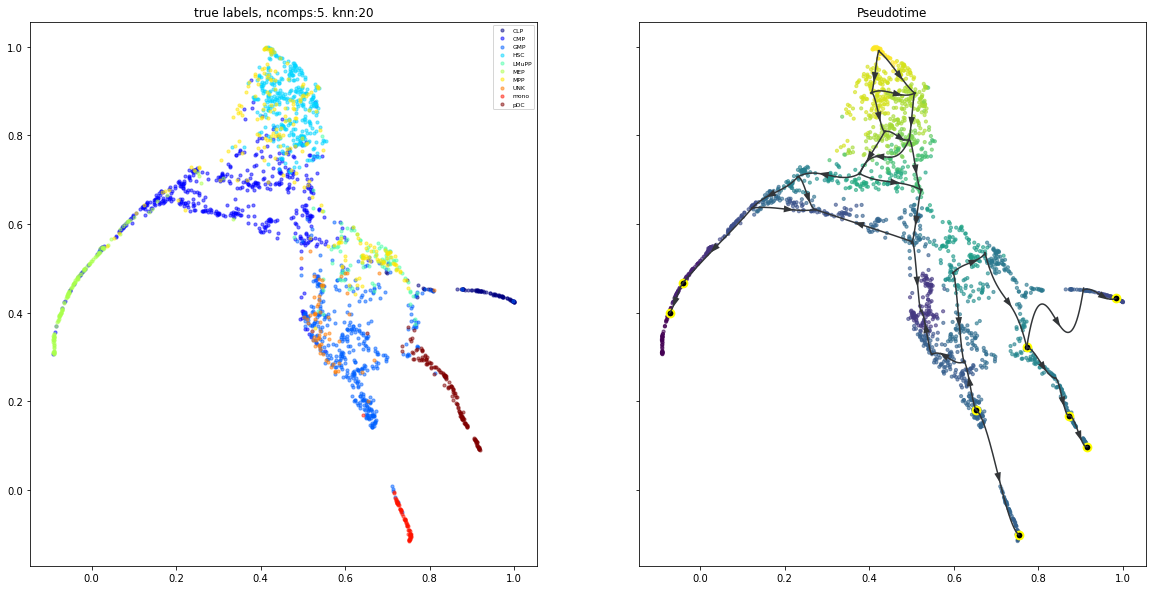

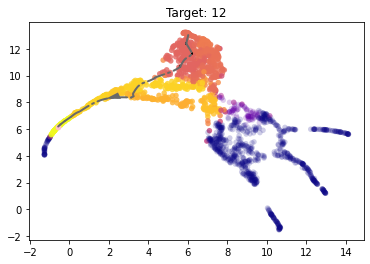

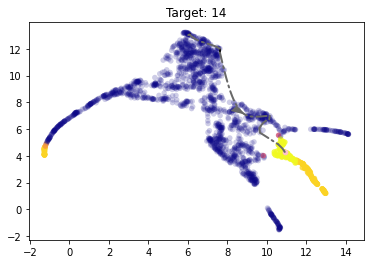

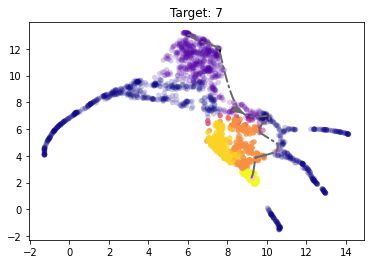

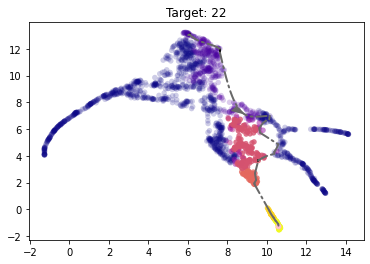

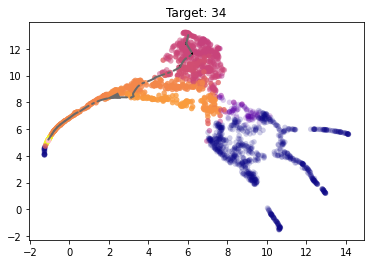

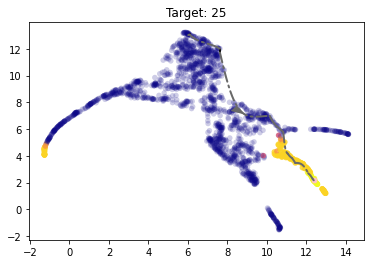

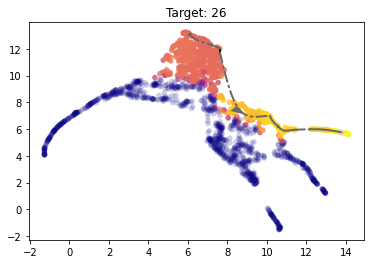

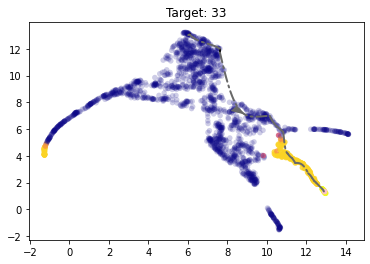

In [8]:
# get knn-graph and locations of terminal states in the embedded space
knn_hnsw = via.make_knn_embeddedspace(embedding)
super_clus_ds_PCA_loc = via.sc_loc_ofsuperCluster_PCAspace(v0, v1, np.arange(0, len(v0.labels)))
# draw overall pseudotime and main trajectories
via.draw_trajectory_gams(embedding, super_clus_ds_PCA_loc, v1.labels, v0.labels, v0.edgelist_maxout,
                     v1.x_lazy, v1.alpha_teleport, v1.single_cell_pt_markov, true_label, knn=v0.knn,
                     final_super_terminal=v1.revised_super_terminal_clusters,
                     sub_terminal_clusters=v1.terminal_clusters,
                     title_str='Pseudotime', ncomp=5)
# draw trajectory and evolution probability for each lineage
via.draw_sc_evolution_trajectory_dijkstra(v1, embedding, knn_hnsw, v0.full_graph_shortpath,np.arange(0, len(true_label)), X_in)
plt.show()